In [23]:
import csv
import cv2
import time
import matplotlib.pyplot as plt
import torch
from src.model import IntRec
from torch.utils.data import DataLoader
import torch.optim as optim
from src.utils import IntImage, get_num_correct

In [24]:
image_path = 'data/processed.csv'
batch_size = 8
model = IntRec()
int_image = IntImage(image_path)
image_loader = DataLoader(int_image, batch_size=8,shuffle=True)


In [25]:
batch = next(iter(image_loader))

<function matplotlib.pyplot.show(*args, **kw)>

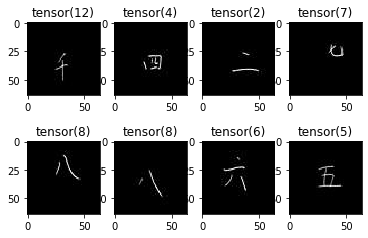

In [26]:
images = batch[0]
label = batch[1]
fig = plt.figure()
for i, image in enumerate(images):
    fig.add_subplot(2, 4, i+1)
    plt.imshow(image, cmap="gray")
    plt.title(label[i])
plt.show

In [27]:
def load_checkpoint(path, model, optimizer):
    checkpoint = torch.load(path, map_location='cpu')
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    return epoch, loss

In [28]:
train_size, valid_size = int(len(int_image) * 0.8), int(len(int_image) * 0.1)
test_size = len(int_image) - train_size - valid_size
train_set, valid_set, test_set = torch.utils.data.random_split(int_image, [train_size, valid_size, test_size])
train_loader = DataLoader(train_set, batch_size=8,shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=8,shuffle=True)
test_loader = DataLoader(test_set, batch_size=8,shuffle=True)

In [29]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
load_checkpoint("saved_model/model1.pickle", model, optimizer)

(0.9995833333333334, tensor(1.1443, requires_grad=True))

# Some Miss Classify Example

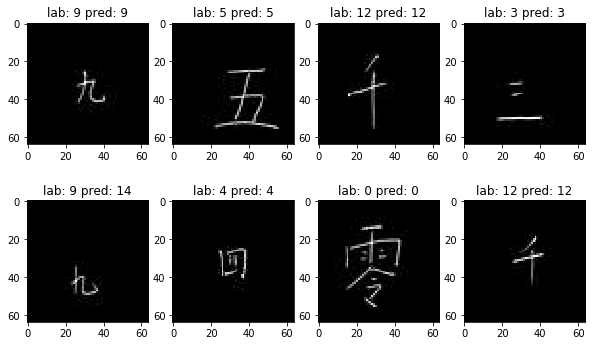

In [48]:
for i, batch in enumerate(test_loader):
    preds = model(torch.unsqueeze(batch[0], 1))
    acc = get_num_correct(preds, batch[1])
    if acc < batch_size:
        images = batch[0]
        label = batch[1]
        fig = plt.figure(figsize=[10, 6])
        for i, image in enumerate(images):
            fig.add_subplot(2, 4, i+1)
            plt.imshow(image, cmap="gray")
            plt.title(f"lab: {label[i]} pred: {preds[i].argmax(dim=0)}")
        plt.show
        break

# Test on image

In [57]:
pic = cv2.imread('pictures/pic1.jpg', cv2.IMREAD_GRAYSCALE)
len(pic)

TypeError: object of type 'NoneType' has no len()

In [56]:
cv2.imshow("pic1", pic)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-v0h6zy15/opencv/modules/highgui/src/window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'
